In [1]:
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from scrape import model_2023

In [2]:
df2022 = extract_players("2022", "rb", "PPR")

In [3]:
names2022 = list(df2022["name"].head(100))
dists2022 = make_dists(names2022, "2022", "rb")
dists2022.head(20)

austin-ekeler
christian-mccaffrey
josh-jacobs
derrick-henry
saquon-barkley
nick-chubb
rhamondre-stevenson
tony-pollard
aaron-jones
joe-mixon
dalvin-cook
leonard-fournette
jamaal-williams
najee-harris-rb
miles-sanders
alvin-kamara
travis-etienne
kenneth-walker-rb
james-conner
jerick-mckinnon
dandre-swift
ezekiel-elliott
devin-singletary
david-montgomery
raheem-mostert
aj-dillon
dameon-pierce
antonio-gibson
tyler-allgeier
jeffery-wilson
cordarrelle-patterson
latavius-murray
jonathan-taylor
samaje-perine
cam-akers
rachaad-white
isiah-pacheco
donta-foreman
kareem-hunt
michael-carter-rb
khalil-herbert
breece-hall
brian-robinson-jr
james-cook
kenyan-drake
clyde-edwards-helaire
jaylen-warren
damien-harris-rb
eno-benjamin
james-robinson
alexander-mattison
kenneth-gainwell
chuba-hubbard
melvin-gordon
deon-jackson
nyheim-hines
jk-dobbins
dontrell-hilliard
chase-edmonds
darrell-henderson
rex-burkhead
jamycal-hasty
joshua-kelley
zack-moss
matt-breida
gus-edwards
zonovan-bam-knight
jd-mckissic
amee

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,austin-ekeler,27,17,6.294118,2.945879,7.470588,4.131908,42.470588,21.038110,7.064706,...,53.823529,39.553739,4.364706,2.742893,17.941176,19.880438,0.764706,0.729981,17.9,0
1,christian-mccaffrey,26,17,5.000000,2.326320,6.352941,2.888948,43.588235,25.233169,8.747059,...,67.000000,32.972359,4.635294,1.500565,20.941176,11.321352,0.470588,0.499134,21.1,0
2,josh-jacobs,24,17,3.117647,1.676213,3.764706,2.015511,23.529412,17.563725,7.788235,...,97.235294,49.222818,4.723529,1.374357,22.235294,18.118984,0.705882,0.892103,10.9,0
3,derrick-henry,28,16,2.062500,1.390537,2.562500,1.730923,24.875000,23.924033,9.675000,...,96.125000,45.852856,4.300000,1.593738,22.750000,16.005858,0.812500,0.726184,9.0,0
4,saquon-barkley,25,16,3.562500,1.730923,4.750000,2.250000,21.125000,13.882881,6.031250,...,82.000000,41.019812,4.437500,1.658642,22.750000,15.221284,0.625000,0.484123,14.6,0
5,nick-chubb,26,17,1.588235,1.374508,2.176471,1.382040,14.058824,14.173175,6.817647,...,89.705882,31.870629,5.076471,1.580592,23.941176,8.177952,0.705882,0.892103,6.9,1
6,rhamondre-stevenson,24,17,4.058824,2.338189,5.176471,2.281261,24.764706,24.822972,4.817647,...,61.176471,42.613496,4.823529,1.993085,18.176471,11.986440,0.294118,0.570315,16.3,0
7,tony-pollard,25,16,2.437500,1.869784,3.437500,2.344375,23.187500,28.478542,6.831250,...,62.937500,37.579031,5.025000,2.782872,22.750000,15.769829,0.562500,0.863767,9.9,0
8,aaron-jones,27,17,3.470588,1.752902,4.235294,1.925965,23.235294,14.707059,7.076471,...,65.941176,43.218284,5.017647,2.270847,18.058824,9.452485,0.117647,0.322190,12.8,2
9,joe-mixon,25,15,4.000000,1.897367,5.000000,2.607681,29.400000,17.575741,6.986667,...,55.066667,36.102570,3.986667,1.700536,14.066667,10.369614,0.466667,1.024153,12.3,0


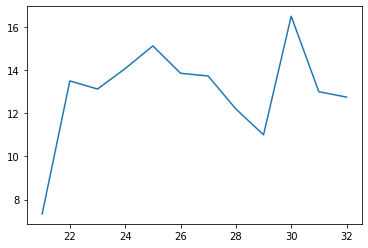

In [4]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

2021 Data

In [5]:
df2021 = extract_players("2021", "rb", "PPR")

In [6]:
names2021 = list(df2021["name"].head(100))
dists2021 = make_dists(names2021, "2021", "rb")
dists2021.head(20)

jonathan-taylor
austin-ekeler
najee-harris-rb
joe-mixon
james-conner
leonard-fournette
ezekiel-elliott
alvin-kamara
cordarrelle-patterson
antonio-gibson
aaron-jones
josh-jacobs
nick-chubb
damien-harris-rb
dandre-swift
dalvin-cook
javonte-williams
devin-singletary
darrel-williams
david-montgomery
melvin-gordon
derrick-henry
aj-dillon
james-robinson
myles-gaskin
elijah-mitchell-rb
darrell-henderson
tony-pollard
michael-carter-rb
saquon-barkley
devonta-freeman
sony-michel
devontae-booker
chase-edmonds
mike-davis-rb
chuba-hubbard
jd-mckissic
christian-mccaffrey
alexander-mattison
brandon-bolden
kenneth-gainwell
rashaad-penny
jamaal-williams
miles-sanders
ty-johnson
clyde-edwards-helaire
rhamondre-stevenson
nyheim-hines
kareem-hunt
mark-ingram
zack-moss
rex-burkhead
dernest-johnson
latavius-murray
kenyan-drake
boston-scott
donta-foreman
ameer-abdullah
justin-jackson-rb
samaje-perine
david-johnson-rb
ronald-jones-ii
khalil-herbert
kyle-juszczyk
jeremy-mcnichols
dontrell-hilliard
alex-collins

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,jonathan-taylor,22,17,2.352941,1.813063,3.000000,2.142017,21.176471,29.007576,7.717647,...,106.529412,42.329405,5.541176,1.830159,33.705882,21.988673,1.058824,0.998268,9.8,0
1,austin-ekeler,26,16,4.375000,2.027159,5.875000,2.869560,40.437500,19.915348,8.781250,...,56.937500,21.358455,4.387500,1.466235,14.062500,5.539277,0.750000,0.661438,13.9,1
2,najee-harris-rb,23,17,4.352941,2.785280,5.529412,3.648007,27.470588,21.796162,6.105882,...,70.588235,41.889292,3.676471,1.183479,15.411765,7.227878,0.411765,0.492153,14.2,1
3,joe-mixon,24,16,2.625000,2.260393,3.000000,2.371708,19.625000,24.949637,4.575000,...,75.312500,35.051246,4.037500,0.928625,16.750000,6.514407,0.812500,0.726184,8.6,1
4,james-conner,26,15,2.466667,2.578544,2.600000,2.678308,25.000000,27.978563,7.186667,...,50.133333,19.979545,3.833333,0.977525,14.533333,7.246762,1.000000,0.816497,6.6,1
5,leonard-fournette,26,14,4.928571,1.830858,6.000000,1.690309,32.428571,12.140336,6.957143,...,58.000000,30.168574,4.264286,1.104929,15.214286,10.994665,0.571429,0.903508,11.5,1
6,ezekiel-elliott,25,17,2.764706,1.925965,3.823529,2.281261,16.882353,13.109863,6.170588,...,58.941176,32.344598,4.017647,1.248639,14.411765,9.665334,0.588235,0.691020,10.0,2
7,alvin-kamara,25,13,3.615385,2.271511,5.153846,2.626672,33.769231,33.459858,7.546154,...,69.076923,40.033566,3.423077,1.224841,15.692308,7.042559,0.307692,0.461538,13.3,1
8,cordarrelle-patterson,30,16,3.250000,1.984313,4.312500,2.283603,34.250000,36.151591,8.387500,...,38.625000,27.071376,3.956250,1.957986,13.062500,8.605730,0.375000,0.599479,12.0,1
9,antonio-gibson,23,16,2.625000,1.798437,3.250000,1.952562,18.375000,18.271819,9.206250,...,64.812500,32.776170,4.037500,1.209274,15.125000,6.243747,0.437500,0.704339,9.5,1


2020 Data

In [7]:
df2020 = extract_players("2020", "rb", "PPR")

In [8]:
names2020 = list(df2020["name"].head(100))
dists2020 = make_dists(names2020, "2020", "rb")
dists2020.head(20)

alvin-kamara
dalvin-cook
derrick-henry
david-montgomery
aaron-jones
jonathan-taylor
james-robinson
josh-jacobs
ezekiel-elliott
kareem-hunt
nick-chubb
mike-davis-rb
antonio-gibson
melvin-gordon
nyheim-hines
kenyan-drake
jd-mckissic
dandre-swift
chris-carson
ronald-jones-ii
david-johnson-rb
clyde-edwards-helaire
miles-sanders
jk-dobbins
chase-edmonds
austin-ekeler
james-conner
myles-gaskin
todd-gurley
giovani-bernard
devin-singletary
jeffery-wilson
wayne-gallman
latavius-murray
leonard-fournette
darrell-henderson
gus-edwards
jamaal-williams
jerick-mckinnon
adrian-peterson-min
tony-pollard
james-white
malcolm-brown
rex-burkhead
cam-akers
zack-moss
frank-gore
raheem-mostert
joe-mixon
boston-scott
brian-hill
kalen-ballage
damien-harris-rb
christian-mccaffrey
alexander-mattison
devontae-booker
carlos-hyde
duke-johnson
kyle-juszczyk
joshua-kelley
sony-michel
benjamin-snell-jr
leveon-bell
kerryon-johnson
salvon-ahmed
phillip-lindsay
samaje-perine
justin-jackson-rb
ty-johnson
jordan-wilkins
ito

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,std_rec,avg_tgt,std_tgt,avg_yds,std_yds,avg_ypr,...,avg_ryds,std_ryds,avg_rypa,std_rypa,avg_rlg,std_rlg,avg_rTD,std_rTD,TM TGT %,class
0,alvin-kamara,24,15,5.533333,3.461535,7.133333,3.667273,50.400000,39.947966,7.540000,...,62.133333,32.859025,4.940000,1.942095,20.400000,12.574047,1.066667,1.481741,20.5,0
1,dalvin-cook,24,14,3.142857,1.551826,3.857143,1.884415,25.785714,19.161638,8.700000,...,111.214286,46.227973,5.000000,1.696214,21.714286,15.871936,1.142857,0.832993,10.5,1
2,derrick-henry,26,16,1.187500,0.949918,1.937500,1.344840,7.125000,12.559235,4.031250,...,126.687500,57.218571,5.275000,1.880658,27.812500,20.967888,1.062500,0.966227,0.6,1
3,david-montgomery,23,15,3.600000,2.122891,4.533333,1.995551,29.200000,14.976426,9.173333,...,71.333333,32.905251,4.486667,2.264175,21.733333,20.660644,0.533333,0.718022,0.2,1
4,aaron-jones,25,14,3.357143,1.230978,4.500000,1.500000,25.357143,18.132871,6.950000,...,78.857143,41.486413,5.321429,2.314297,28.857143,23.724180,0.642857,0.610286,0.4,1
5,jonathan-taylor,21,15,2.400000,1.496663,2.666667,1.445299,19.933333,19.478079,6.980000,...,77.933333,58.393455,4.606667,1.835744,19.866667,16.239321,0.733333,0.771722,0.7,1
6,james-robinson,21,14,3.500000,1.721710,4.285714,1.749636,24.571429,18.599978,7.421429,...,76.428571,30.129990,4.378571,1.142790,19.285714,10.924602,0.500000,0.626783,9.7,2
7,josh-jacobs,22,15,2.200000,1.375984,3.000000,1.505545,15.866667,13.370947,5.526667,...,71.000000,28.710045,3.913333,1.043626,15.533333,5.524089,0.800000,0.979796,8.2,1
8,ezekiel-elliott,24,15,3.466667,2.390723,4.733333,2.885981,22.533333,15.915890,7.260000,...,65.266667,24.825972,3.933333,0.829190,14.933333,6.577402,0.400000,0.611010,11.1,2
9,kareem-hunt,24,16,2.375000,1.452369,3.187500,1.775484,19.000000,18.445867,6.662500,...,52.562500,26.619938,4.312500,1.862080,14.687500,7.303413,0.375000,0.599479,0.4,2


In [9]:
res = model_2023('rb', 'PPR', dists2020, dists2021, dists2022)
res.head(50)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-6.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.041 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-6.643 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-5.804 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-4.654 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-6.773 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-4.986 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-6.538 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-5.698 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-4.411 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-6.285 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,name,proj fpts,class
0,josh-jacobs,16.563602,0
1,austin-ekeler,16.123796,0
2,christian-mccaffrey,15.69428,0
3,derrick-henry,15.314218,0
4,nick-chubb,14.398756,1
5,saquon-barkley,13.97981,0
6,joe-mixon,13.655764,0
7,rhamondre-stevenson,13.644595,0
8,alvin-kamara,13.474491,2
9,james-conner,12.833734,2


In [11]:
res.to_csv('2022_rb_projections.csv')